# Tasca 6A: Visualització gràfica Multiples variables
### Descripció
Anem a practicar i a familiaritzar-nos amb la Visualització gràfica de Múltiples variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
# Paràmetres per formatejar els gràfics
titleParams = {'fontsize': 14, 
            'fontweight':'bold',
            'color':'blue',
            'verticalalignment': 'baseline',}
axes_label_params = {'fontsize':12, 'weight':'bold'}



### Exercici 1
Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

> #### Scatter Plots

#### Carreguem el Dataset Tips

In [3]:
DATAPATH='../Data-sources/'
tips = pd.read_csv(DATAPATH+'tips.csv', sep = ',', encoding = 'utf-8')

In [4]:
tips.shape

(244, 7)

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.describe().style.format('{:.2f}')

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


|Camps|Descripció|Tipus|
|-|-|-|
|total_bill| total menjar|float|
|tip| propina|float|
|sex| m/w|category|
|smoker| fumador|category|
|day| dia de la setmana|category|
|time| dinar o sopar|category|
|size| mida de la taula|int -cat ordinal?-|

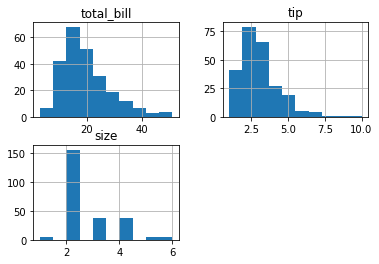

In [11]:
ax = tips.hist()

Text(0.5, 1.0, 'Tips and total bill (by sex and size)')

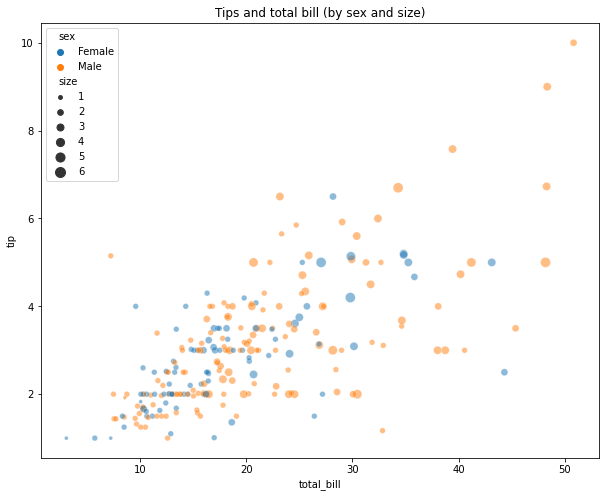

In [19]:
plt.figure(figsize=(10,8))
g = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size', sizes=(15,100), alpha=0.5)
g.set_title('Tips and total bill (by sex and size)')

Text(0.5, 1.0, '% de propina sobre el menjar (i dia de la setmana)')

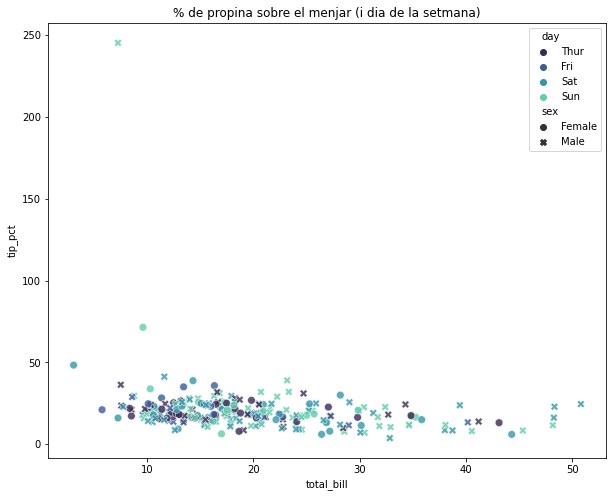

In [41]:
tips['tip_pct'] = round((tips.tip / (tips.total_bill - tips.tip))*100, 2)
day_list = ['Thur','Fri','Sat','Sun']

plt.figure(figsize=(10,8))
g = sns.scatterplot(data=tips, x='total_bill', y='tip_pct', hue='day', hue_order=day_list
                    , style='sex', alpha=0.8, palette='mako', s=60)
g.set_title('% de propina sobre el menjar (i dia de la setmana)')


Text(0.5, 1.0, '% de propina sobre el menjar (i fumador)')

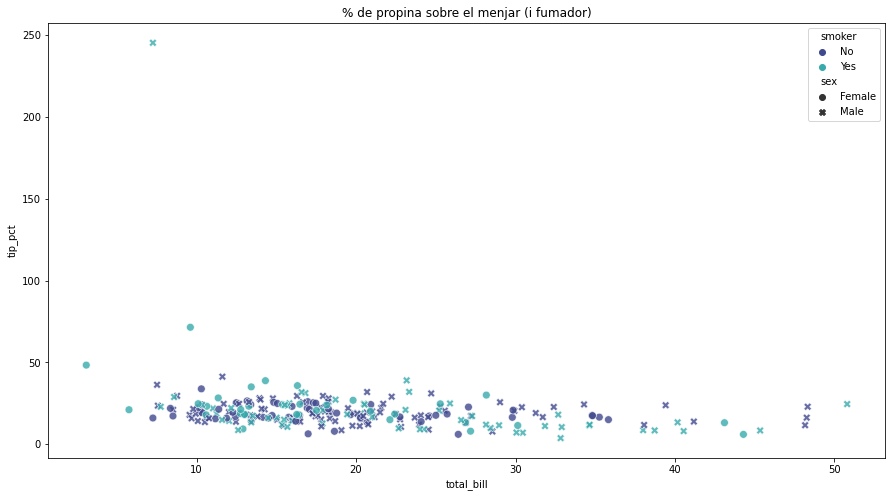

In [50]:

day_list = ['Thur','Fri','Sat','Sun']

plt.figure(figsize=(15,8))
g = sns.scatterplot(data=tips, x='total_bill', y='tip_pct', hue='smoker'
                    , style='sex', alpha=0.8, palette='mako', s=60)
g.set_title('% de propina sobre el menjar (i fumador)')


### Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [54]:
movies = pd.read_csv(DATAPATH+'movies.dat', sep='::', encoding='iso-8859-1', names=['movie_id', 'Name','Categories'])
movies.head()

,movie_id,Name,Categories
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [55]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_id    3883 non-null   int64 
 1   Name        3883 non-null   object
 2   Categories  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [56]:
# a, b = zip(*movies.Name.str.strip(')').str.split('('))
movies[['name','year']] = movies.Name.str.rsplit('(',1,expand=True)
movies['year'] = movies.year.str.strip(')').astype('int')


In [57]:
cat_list = list(set(movies.Categories.str.split('|').sum()))
movies['cat_list'] = movies.Categories.str.split('|')

In [58]:
pd.unique(movies.Categories.str.rsplit('|').sum())

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [59]:
movies = pd.concat((movies,
            pd.DataFrame(data=np.zeros(shape=(movies.shape[0],len(cat_list))),
                 index=movies.index,
                 columns=cat_list)),
            axis=1)

In [60]:
for i, cats in enumerate(movies.cat_list):
    movies.loc[i, cats] = 1.0


In [61]:
movies.head(10)

,movie_id,Name,Categories,name,year,cat_list,Adventure,Animation,Children's,Fantasy,...,Thriller,Horror,Musical,Romance,Sci-Fi,War,Action,Mystery,Film-Noir,Documentary
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995,"[Animation, Children's, Comedy]",0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995,"[Adventure, Children's, Fantasy]",1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995,"[Comedy, Romance]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995,"[Comedy, Drama]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995,[Comedy],0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Heat (1995),Action|Crime|Thriller,Heat,1995,"[Action, Crime, Thriller]",0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,7,Sabrina (1995),Comedy|Romance,Sabrina,1995,"[Comedy, Romance]",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,Tom and Huck (1995),Adventure|Children's,Tom and Huck,1995,"[Adventure, Children's]",1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Sudden Death (1995),Action,Sudden Death,1995,[Action],0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,GoldenEye,1995,"[Action, Adventure, Thriller]",1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

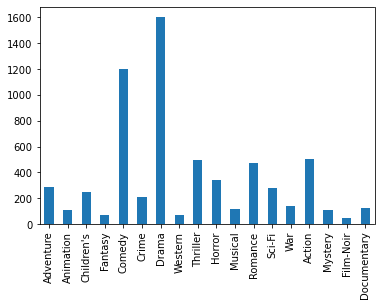

In [62]:
movies[cat_list].sum().plot(kind='bar')

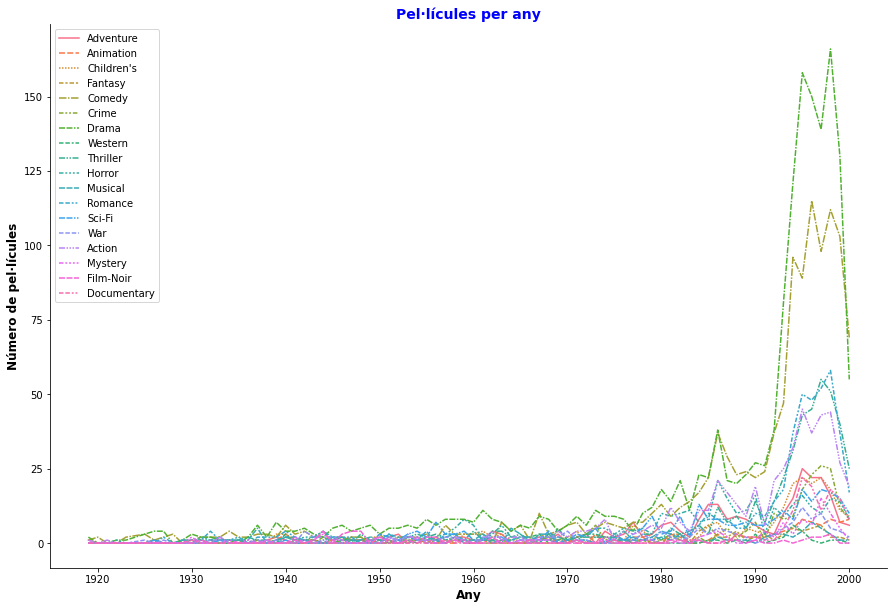

In [63]:
g = plt.figure(figsize=(15,10))
g = sns.lineplot(data=movies.groupby(by='year')[cat_list].sum())

g.set_title('Pel·lícules per any', fontdict=titleParams)

g.xaxis.set_label_text('Any', fontdict=axes_label_params)
g.yaxis.set_label_text('Número de pel·lícules', fontdict=axes_label_params)

sns.despine()

In [64]:
# movies[cat_list].stack()
movies[cat_list].stack()


0     Adventure      0.0
      Animation      1.0
      Children's     1.0
      Fantasy        0.0
      Comedy         1.0
                    ... 
3882  War            0.0
      Action         0.0
      Mystery        0.0
      Film-Noir      0.0
      Documentary    0.0
Length: 69894, dtype: float64

In [65]:
movies[cat_list].sum().sort_values()[-5:].index

Index(['Romance', 'Thriller', 'Action', 'Comedy', 'Drama'], dtype='object')

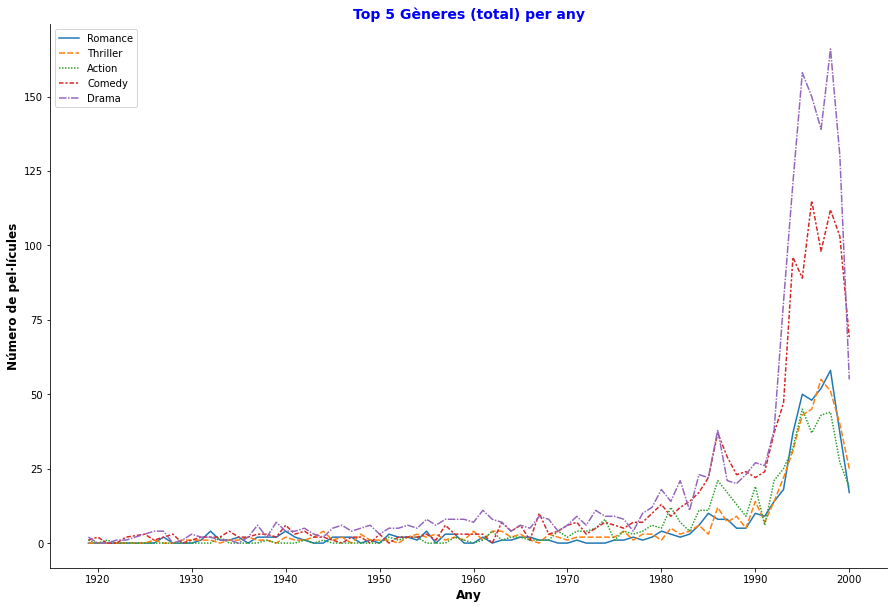

In [66]:
g = plt.figure(figsize=(15,10))
g= sns.lineplot(data=movies.groupby(by='year')[cat_list].sum()[movies[cat_list].sum().sort_values()[-5:].index], )

g.set_title('Top 5 Gèneres (total) per any', fontdict=titleParams)

g.xaxis.set_label_text('Any', fontdict=axes_label_params)
g.yaxis.set_label_text('Número de pel·lícules', fontdict=axes_label_params)

sns.despine()

In [67]:
# movies_year = pd.concat((movies.groupby(by='year').agg({'movie_id':'count'}),
#                         movies.groupby(by='year')[cat_list].sum()), axis=1)


# movies_year.rename(columns={'movie_id':'num_films'}, inplace=True)

# data = movies_year.stack().reset_index()
# data.columns = ['year','cat','total']

# grid = sns.FacetGrid(data[data.cat.isin(cat_list)].sort_values(by='total', ascending=False), 
#                      col='cat', palette='tab20c', hue='cat', col_wrap=4, height=3)

# # grid.map(plt.axhline, y=0, ls=':', c='.5')

# grid.map(sns.lineplot, 'year', 'total', y=0, marker=None)

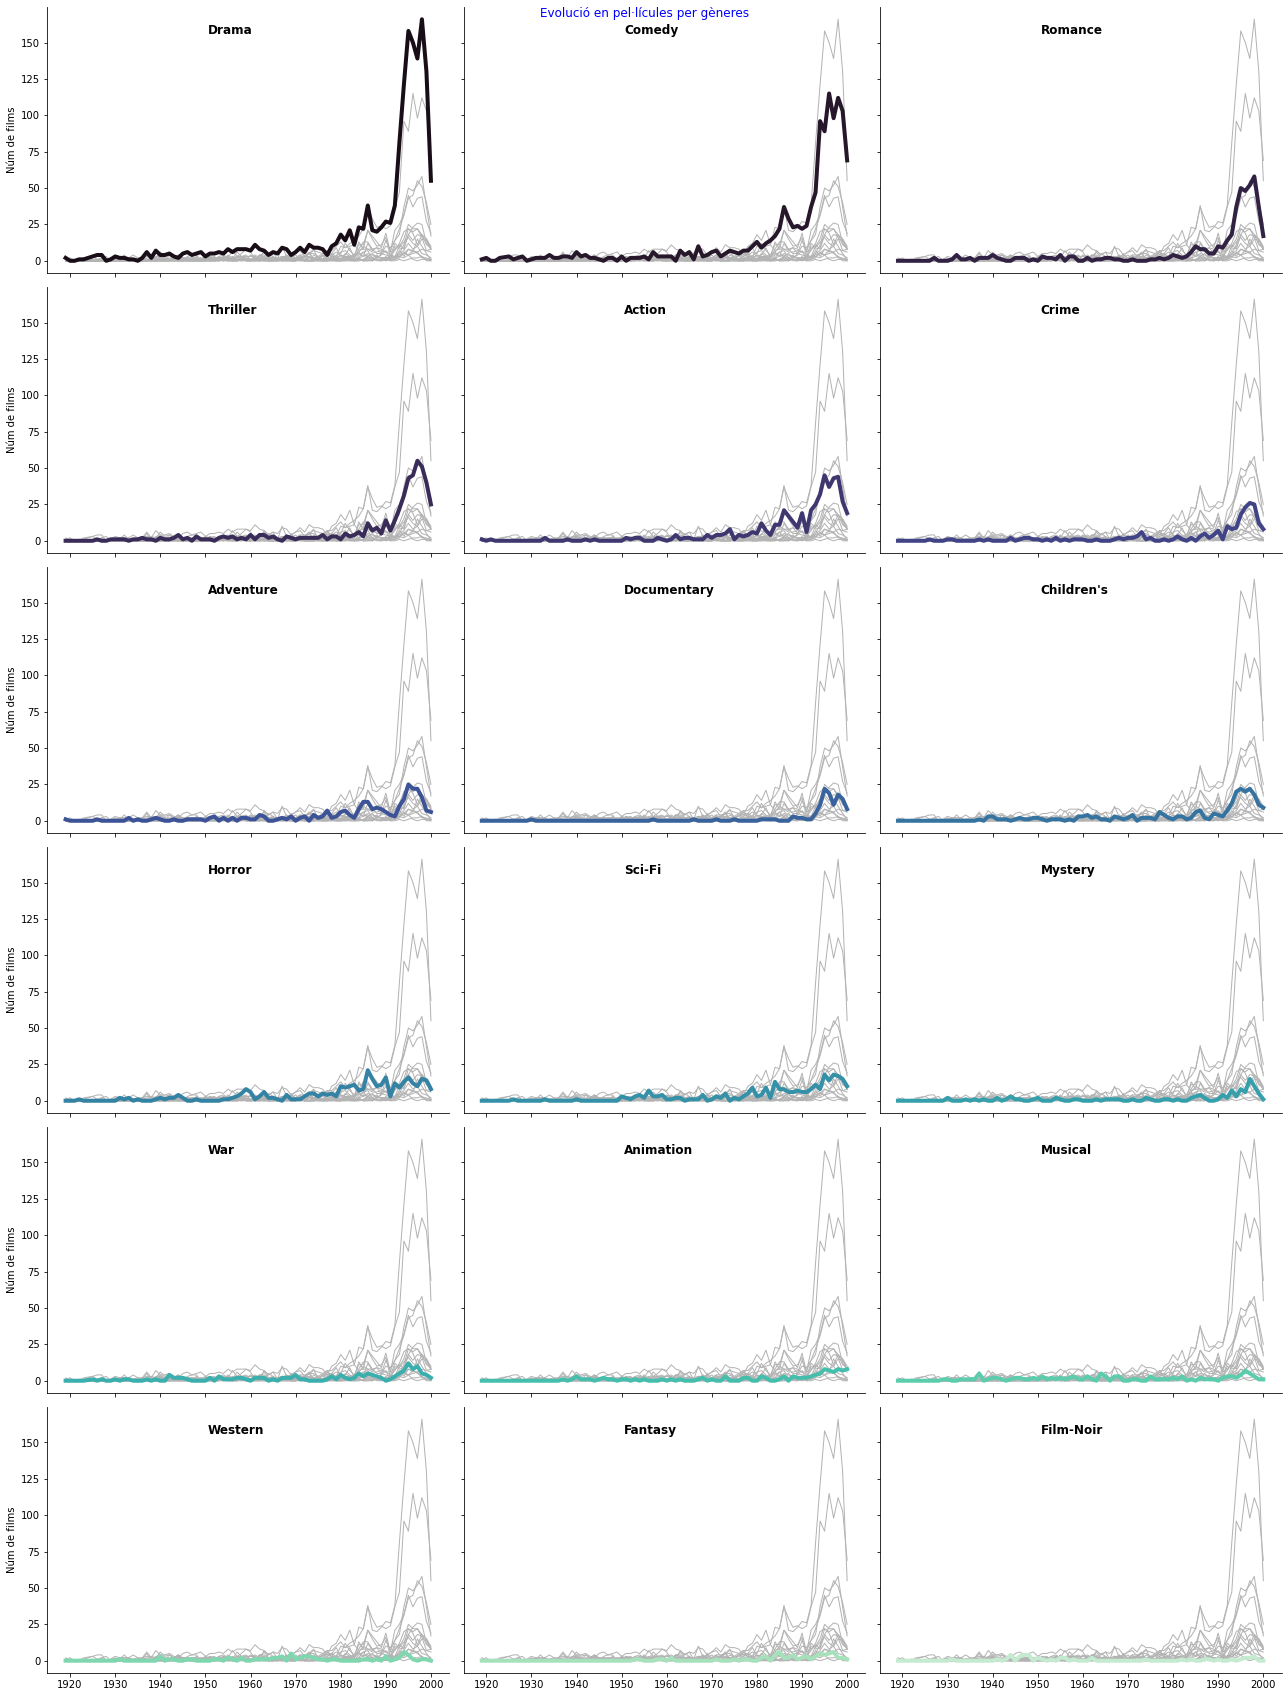

In [68]:
# https://seaborn.pydata.org/examples/timeseries_facets.html

data = movies.groupby(by='year')[cat_list].sum().stack().reset_index()
data.columns = ['year','cat','valor']

g = sns.relplot(data=data.sort_values(by='valor',ascending=False), x='year', y='valor', 
                col='cat', hue='cat', kind='line',
                linewidth=4, zorder=5, palette='mako',
               col_wrap=3, height=4, aspect=1.5, legend=False)

for cat, ax in g.axes_dict.items():
    ax.text(.4, .90, cat, transform=ax.transAxes, 
            fontweight='bold', fontsize=12)
    sns.lineplot(data=data, x='year', y='valor', units='cat', estimator=None,
                 color='.7', linewidth=1,
                 ax=ax, legend=False, )
# sns.lineplot(data=movies.groupby(by='year')[cat_list].sum()[movies[cat_list].sum().sort_values()[-5:].index], )

g.fig.suptitle('Evolució en pel·lícules per gèneres', fontdict=titleParams)

g.set_titles('')
g.set_axis_labels("", 'Núm de films')
g.tight_layout()

#### Mitja de gèneres per pel·lícula i any
- Tenen les pel·lícules noves més gèneres que les antigues? 
- Hi ha canvis en el tipus de pel·lícules amb els anys? (per exemple, més comèdies o drames)

<AxesSubplot:xlabel='year'>

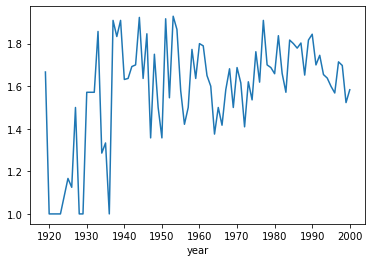

In [69]:
movies_year = pd.concat((movies.groupby(by='year')['name'].count(),
                movies.groupby(by='year')[cat_list].sum().sum(axis=1)), axis=1 )
movies_year.columns = ['num_movies','num_genres']

(movies_year.num_genres/movies_year.num_movies).plot()

In [70]:
movies_year = pd.concat((movies.groupby(by='year').agg({'movie_id':'count'}),
                        movies.groupby(by='year')[cat_list].sum()), axis=1)


movies_year.rename(columns={'movie_id':'num_films'}, inplace=True)

In [71]:
movies_year

,num_films,Adventure,Animation,Children's,Fantasy,Comedy,Crime,Drama,Western,Thriller,Horror,Musical,Romance,Sci-Fi,War,Action,Mystery,Film-Noir,Documentary
year,,,,,,,,,,,,,,,,,,,
1919,3,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1920,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1922,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923,3,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,345,22.0,7.0,20.0,5.0,115.0,23.0,150.0,1.0,45.0,12.0,7.0,48.0,14.0,8.0,37.0,6.0,2.0,19.0
1997,315,22.0,6.0,22.0,6.0,98.0,26.0,139.0,0.0,55.0,10.0,5.0,52.0,18.0,10.0,43.0,15.0,2.0,11.0
1998,337,16.0,8.0,18.0,2.0,112.0,25.0,166.0,1.0,51.0,15.0,3.0,58.0,17.0,5.0,44.0,10.0,3.0,18.0


In [72]:
movies_year['tot_cat'] = movies_year[cat_list].sum(axis=1)

np.divide(movies_year[cat_list], movies_year.num_films.values.reshape(-1,1))


# movies_year.loc[:,cat_list].div(movies_year.num_films, axis=0)

,Adventure,Animation,Children's,Fantasy,Comedy,Crime,Drama,Western,Thriller,Horror,Musical,Romance,Sci-Fi,War,Action,Mystery,Film-Noir,Documentary
year,,,,,,,,,,,,,,,,,,
1919,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
1920,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1923,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.063768,0.020290,0.057971,0.014493,0.333333,0.066667,0.434783,0.002899,0.130435,0.034783,0.020290,0.139130,0.040580,0.023188,0.107246,0.017391,0.005797,0.055072
1997,0.069841,0.019048,0.069841,0.019048,0.311111,0.082540,0.441270,0.000000,0.174603,0.031746,0.015873,0.165079,0.057143,0.031746,0.136508,0.047619,0.006349,0.034921
1998,0.047478,0.023739,0.053412,0.005935,0.332344,0.074184,0.492582,0.002967,0.151335,0.044510,0.008902,0.172107,0.050445,0.014837,0.130564,0.029674,0.008902,0.053412


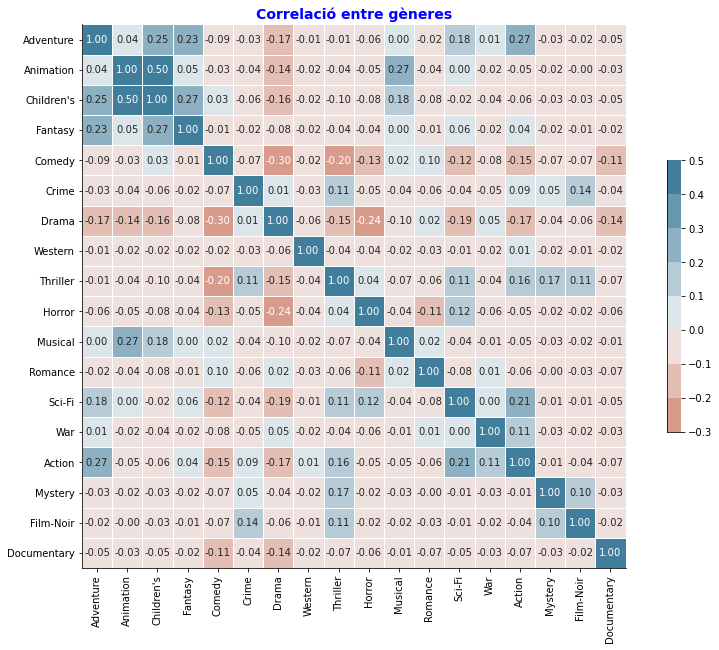

In [73]:
plt.figure(figsize=(15,10))

corr = movies[cat_list].corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(20, 230, n=10) # si volem un degradat 'continu' posem as_cmap=True 
g= sns.heatmap(corr,  cmap=cmap, center=0., annot=True, fmt='.2f',
            vmax=0.5, vmin=-.3,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

g.set_title('Correlació entre gèneres', fontdict=titleParams)

sns.despine()

Text(0.5, 0.98, 'Correlació entre gèneres')

<Figure size 1080x720 with 0 Axes>

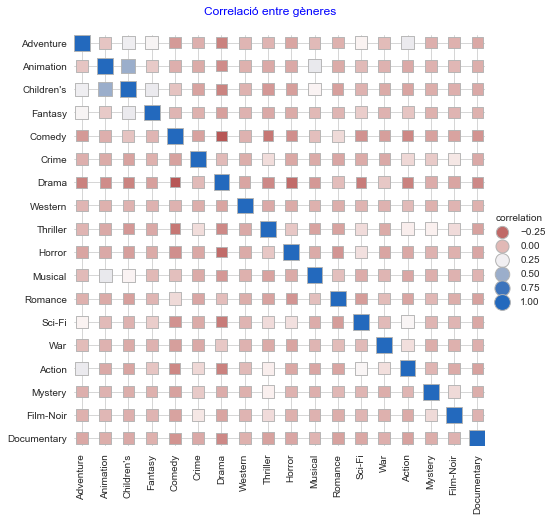

In [74]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
g = sns.relplot(data = corr.stack().reset_index(name='correlation'), 
            x='level_0', y='level_1', hue='correlation', size='correlation',
            palette='vlag_r', hue_norm=(-.4,.8), edgecolor='.7',
            marker=u',',
            height=7, sizes=(50,250), size_norm=(-.8, 1.))
#             cmap=cmap, center=0., annot=True, fmt='.2f',
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.grid()
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
g.fig.suptitle('Correlació entre gèneres', fontdict=titleParams)

In [75]:
movies.Drama.sum()

1603.0

In [76]:
(movies_year[cat_list].sum().sort_values(ascending=False) / len(movies) * 100).reset_index().rename(columns={'index':'cat',0:'valor'})

,cat,valor
0,Drama,41.282514
1,Comedy,30.903940
2,Action,12.953902
3,Thriller,12.670616
4,Romance,12.129797
5,Horror,8.833376
6,Adventure,7.288179
7,Sci-Fi,7.107906
8,Children's,6.464074
9,Crime,5.433943


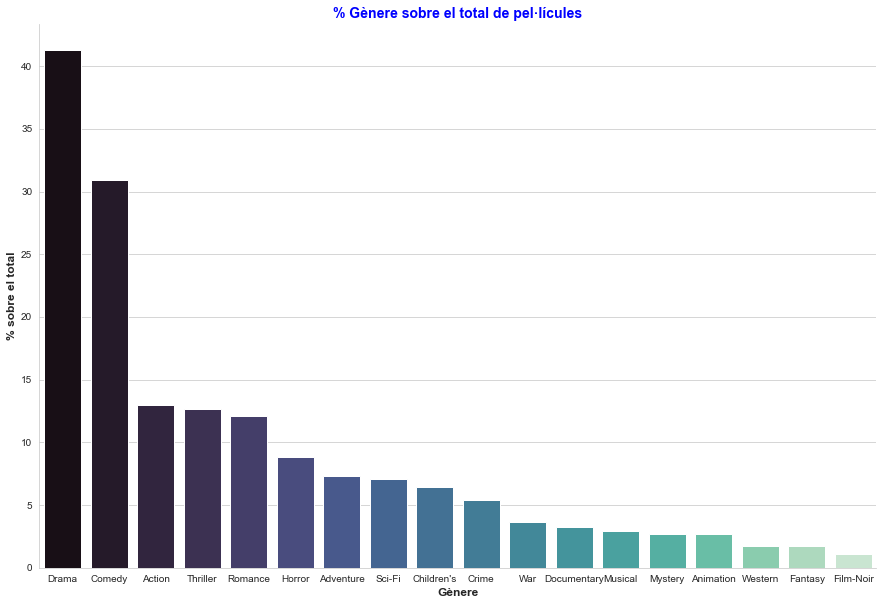

In [77]:
plt.figure(figsize=(15,10))
data = (movies_year[cat_list].sum().sort_values(ascending=False) / len(movies) * 100).reset_index().rename(columns={'index':'cat',0:'valor'}) 
g = sns.barplot(data=data, x='cat', y='valor', palette='mako')

g.set_title('% Gènere sobre el total de pel·lícules', fontdict=titleParams)

g.xaxis.set_label_text('Gènere', fontdict=axes_label_params)
g.yaxis.set_label_text('% sobre el total', fontdict=axes_label_params)

sns.despine()


In [78]:
len(movies[(movies.Adventure > 0) & (movies.Action>0)]) / len(movies[movies.Action >0])

0.2544731610337972

In [79]:
movies_year[cat_list]

,Adventure,Animation,Children's,Fantasy,Comedy,Crime,Drama,Western,Thriller,Horror,Musical,Romance,Sci-Fi,War,Action,Mystery,Film-Noir,Documentary
year,,,,,,,,,,,,,,,,,,
1919,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1920,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1922,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,22.0,7.0,20.0,5.0,115.0,23.0,150.0,1.0,45.0,12.0,7.0,48.0,14.0,8.0,37.0,6.0,2.0,19.0
1997,22.0,6.0,22.0,6.0,98.0,26.0,139.0,0.0,55.0,10.0,5.0,52.0,18.0,10.0,43.0,15.0,2.0,11.0
1998,16.0,8.0,18.0,2.0,112.0,25.0,166.0,1.0,51.0,15.0,3.0,58.0,17.0,5.0,44.0,10.0,3.0,18.0


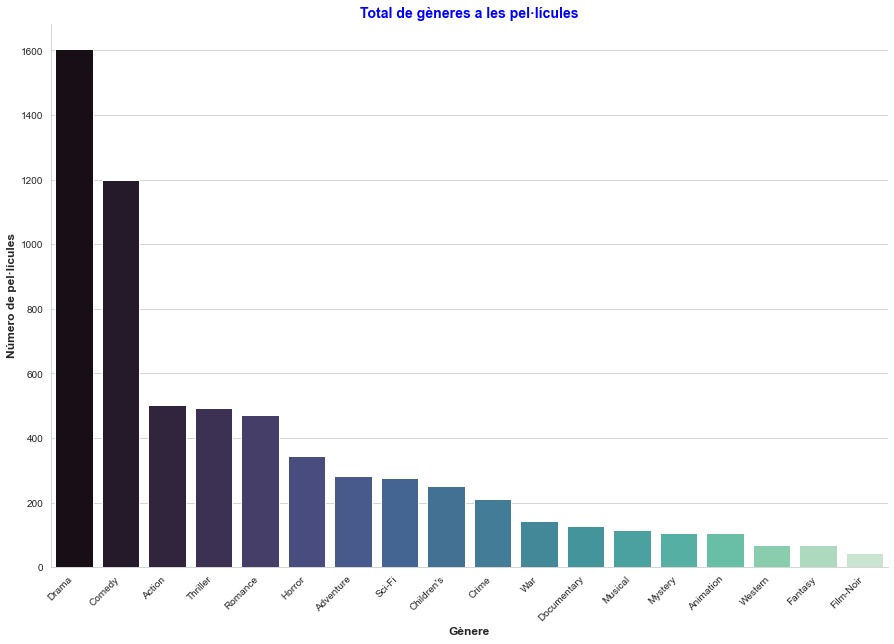

In [80]:
plt.figure(figsize=(15,10))
data = movies[cat_list].sum().sort_values(ascending=False)
g = sns.barplot(x=data.index, y=data, palette='mako')
labels = g.set_xticklabels(g.get_xticklabels(), rotation=45, 
                           horizontalalignment='right')

g.set_title('Total de gèneres a les pel·lícules', fontdict=titleParams)

g.xaxis.set_label_text('Gènere', fontdict=axes_label_params)
g.yaxis.set_label_text('Número de pel·lícules', fontdict=axes_label_params)

sns.despine()

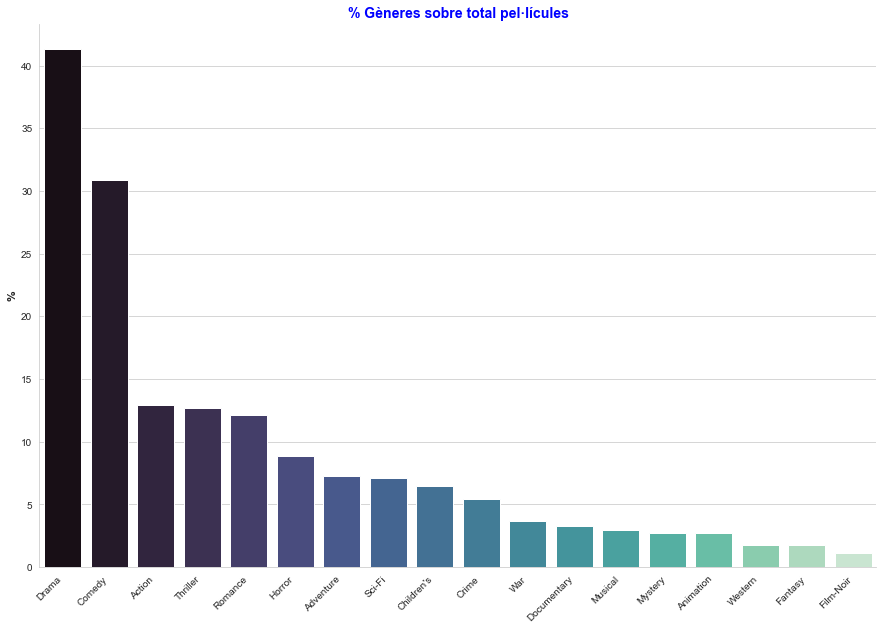

In [81]:
plt.figure(figsize=(15,10))
sns.set_style(style='whitegrid')
data = movies[cat_list].sum().sort_values(ascending=False)/ len(movies)
g = sns.barplot(x=data.index, y=data*100, palette='mako')
labels = g.set_xticklabels(g.get_xticklabels(), rotation=45, 
                           horizontalalignment='right')

g.set_title('% Gèneres sobre total pel·lícules', fontdict=titleParams)

# g.xaxis.set_label_text('Gènere', fontdict=axes_label_params)
g.yaxis.set_label_text('%', fontdict=axes_label_params)

sns.despine()

### Exercici 3
Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.

### Remakes

In [82]:
# Llista de pel·lícules que tenen 'remake'

mov_group = movies.groupby(by='name')
mask = mov_group.movie_id.count() > 1
version_list = mask[mask == True].index.tolist()

# Comptem quantes versions hi ha
movies[movies.name.isin(version_list)].name.value_counts()



Hamlet                                         5
Mummy, The                                     3
Parent Trap, The                               2
Godzilla (Gojira)                              2
Ballad of Narayama, The (Narayama Bushiko)     2
Titanic                                        2
Dracula                                        2
Miracle on 34th Street                         2
King Kong                                      2
My Man Godfrey                                 2
Fly, The                                       2
King and I, The                                2
101 Dalmatians                                 2
That Darn Cat!                                 2
Psycho                                         2
General, The                                   2
Wonderland                                     2
True Crime                                     2
Doctor Dolittle                                2
Get Carter                                     2
Thomas Crown Affair,

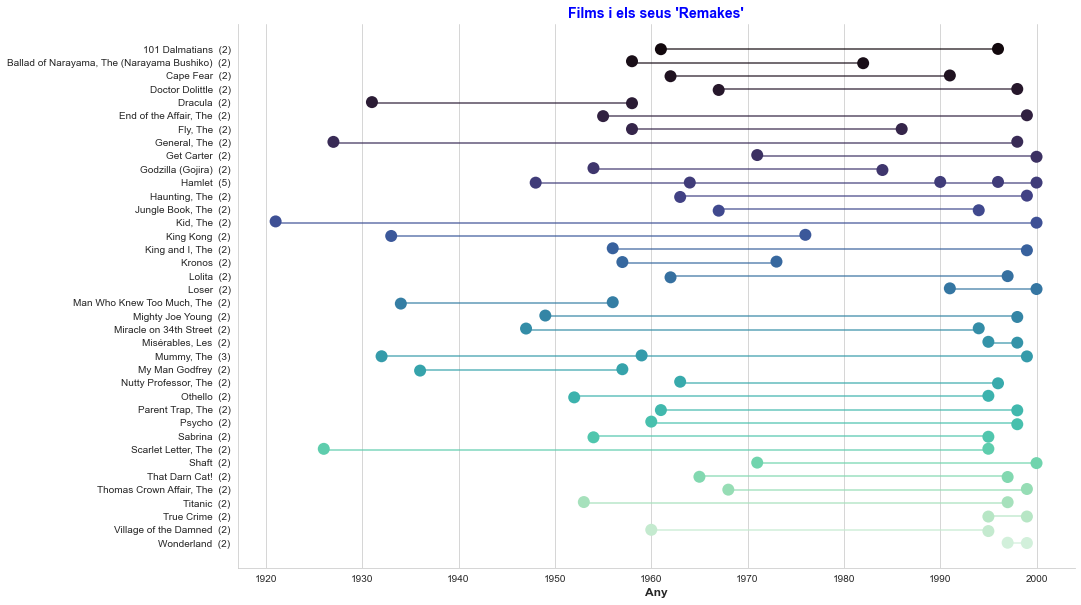

In [83]:

plt.figure(figsize=(15,10))


data = movies[movies.name.isin(version_list)][['name','year']].sort_values(by='name',ascending=True)
names = data.groupby('name').count()
names = (names.index + ' (' + names.year.astype(str) + ')').values


my_range = range(0, len(data.groupby('name').year.min().index))
g = sns.stripplot(data=data, x='year',y='name', size=12, palette='mako')
g.hlines(y=my_range, xmin=data.groupby('name')['year'].min(),
        xmax=data.groupby('name').year.max(), 
                color=sns.color_palette(palette='mako', n_colors=len(data.groupby('name')['year'].min())), alpha=0.8, )
g.yaxis.grid(False)
g.yaxis.set_label_text('')
g.axes.set_yticklabels(names)

g.xaxis.set_label_text('Any', fontdict=axes_label_params)

g.set_title("Films i els seus 'Remakes'", fontdict=titleParams)
# g.yaxis.tick_right()

sns.despine()

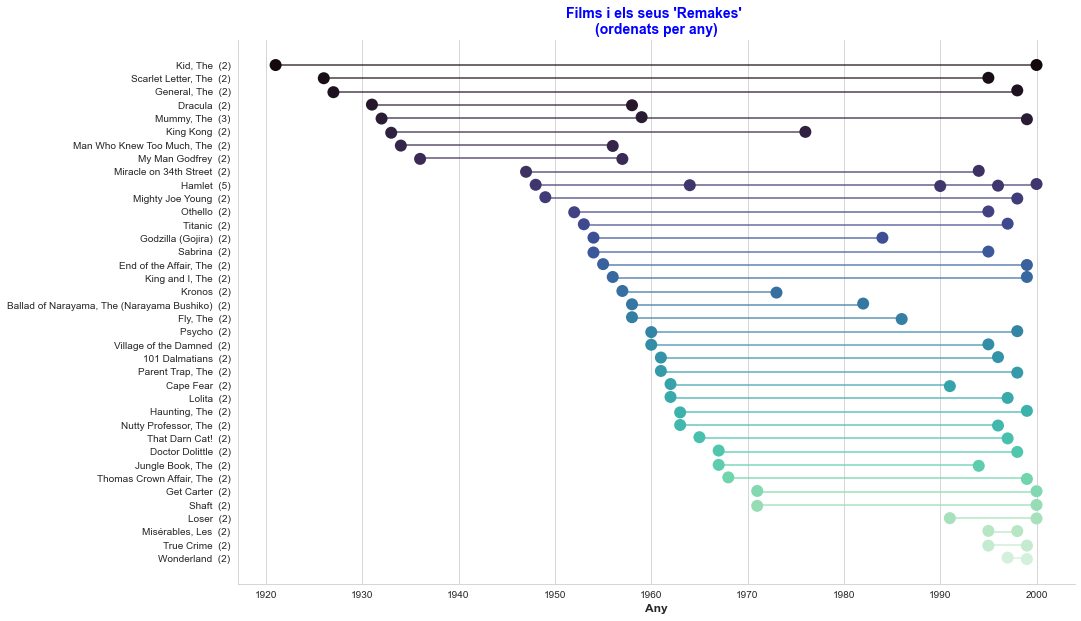

In [110]:
rcParams = {'axes.titlesize': 14, 
            'axes.titleweight':'bold',
            'axes.titlecolor':'blue',
            'horizontal_alignment':'center'}

plt.figure(figsize=(15,10))


data = movies[movies.name.isin(version_list)][['name','year']].sort_values(by=['year','name'],ascending=True)
names = data.groupby('name', sort=False).count()
names_c = (names.index + ' (' + names.year.astype(str) + ')').values

my_range = range(0, len(data.groupby('name').min().index))

g = sns.stripplot(data=data, x='year',y='name', size=12, palette='mako')
g.hlines(y=my_range, 
         xmin=data.groupby('name').agg({'year':['min','max']}).reindex(names.index)[('year','min')].values,
         xmax=data.groupby('name').agg({'year':['min','max']}).reindex(names.index)[('year','max')].values, 
                color=sns.color_palette(palette='mako', n_colors=len(data.groupby('name')['year'].min())), alpha=0.8, )
g.yaxis.grid(False)
g.yaxis.set_label_text('')
g.axes.set_yticklabels(names_c)

g.xaxis.set_label_text('Any', fontdict={'fontsize':12, 'weight':'bold'})

g.set_title("Films i els seus 'Remakes' \n(ordenats per any)", fontdict={'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'color': rcParams['axes.titlecolor'],
        'verticalalignment': 'baseline'})
# g.yaxis.tick_right()




sns.despine()

### Dècades

In [145]:
movies['decade'] = "'" + (10 * (movies.sort_values('year').year // 10)).astype(str).str.slice(start=2) 

decade_list = ["'10", "'20", "'30", "'40", "'50", "'60", "'70", "'80", "'90","'00"]

In [170]:
top_gen = movies[cat_list].sum(axis=0).sort_values(ascending=False).head(5).index.to_list()
bottom_gem = movies[cat_list].sum(axis=0).sort_values().head(5).index.to_list()

<AxesSubplot:xlabel='decade'>

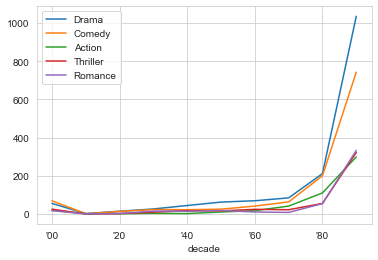

In [171]:
movies.groupby('decade').sum()[top_gen].plot()

Text(0.5, 52.0, 'Dècada')

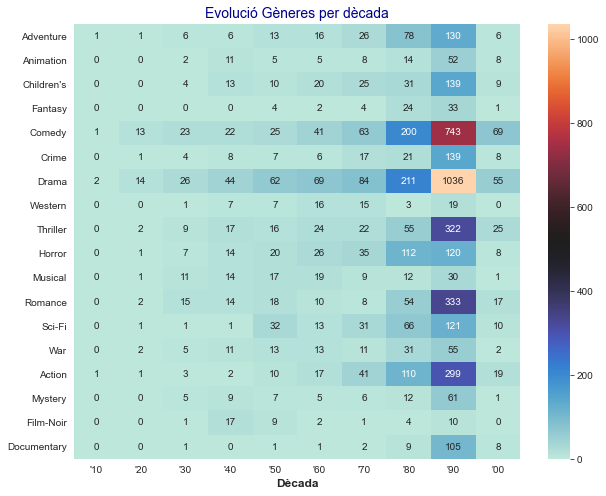

In [211]:
plt.figure(figsize=(10,8))
g = sns.heatmap(movies.groupby('decade', )[cat_list].sum().T[decade_list], cmap='icefire',
                annot=True, fmt='.0f')

g.set_title('Evolució Gèneres per dècada', fontdict={'fontsize':14, 'color':'darkblue'} )
g.set_xlabel('Dècada', fontdict={'fontsize':12, 'fontweight':'bold'})